In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans
import random 
import pylab as pl
%matplotlib inline

In [2]:
card = pd.read_csv("kartukredit.csv")

In [3]:
card.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
card.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [5]:
card.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
mean_value=card['CREDIT_LIMIT'].mean()
card['CREDIT_LIMIT']=card['CREDIT_LIMIT'].fillna(mean_value)

In [7]:
mean_value=card['MINIMUM_PAYMENTS'].mean()
card['MINIMUM_PAYMENTS']=card['MINIMUM_PAYMENTS'].fillna(mean_value)

In [8]:
card.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


In [9]:
card.cov()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,4.332775e+06,158.988998,8.061523e+05,5.678461e+05,2.380664e+05,2.168214e+06,-65.119343,45.435849,-52.273592,187.125835,5471.365291,7985.773745,4.023757e+06,1.945257e+06,1.912737e+06,-194.197159,202.504520
BALANCE_FREQUENCY,1.589890e+02,0.056124,6.766297e+01,4.102345e+01,2.662852e+01,4.937859e+01,0.021843,0.014306,0.016579,0.009097,0.228864,1.116684,8.257505e+01,4.458579e+01,6.307998e+01,-0.006589,0.037976
PURCHASES,8.061523e+05,67.662970,4.565208e+06,3.251657e+06,1.313723e+06,-2.306495e+05,337.044946,317.716663,267.979467,-51.371585,-979.535067,36623.760369,2.775135e+06,3.731605e+06,4.656663e+05,112.730411,246.743184
ONEOFF_PURCHASES,5.678461e+05,41.023448,3.251657e+06,2.755228e+06,4.962960e+05,-1.090465e+05,176.509300,259.928390,84.265286,-27.447210,-523.498146,22508.787926,1.931018e+06,2.726109e+06,1.879996e+05,64.458433,142.507934
INSTALLMENTS_PURCHASES,2.380664e+05,26.628521,1.313723e+06,4.962960e+05,8.178274e+05,-1.218410e+05,160.586498,57.747937,183.793384,-23.946638,-456.707265,14119.681306,8.440096e+05,1.005576e+06,2.775494e+05,48.292913,104.259027
CASH_ADVANCE,2.168214e+06,49.378593,-2.306495e+05,-1.090465e+05,-1.218410e+05,4.398096e+06,-181.401230,-54.278472,-147.589949,263.782761,9396.057137,-3954.112719,2.319620e+06,2.751800e+06,6.804697e+05,-93.813403,-191.732461
PURCHASES_FREQUENCY,-6.511934e+01,0.021843,3.370449e+02,1.765093e+02,1.605865e+02,-1.814012e+02,0.161098,0.060033,0.137659,-0.024778,-0.557369,5.671300,1.749279e+02,1.202246e+02,2.783469e+00,0.035901,0.033039
ONEOFF_PURCHASES_FREQUENCY,4.543585e+01,0.014306,3.177167e+02,2.599284e+02,5.774794e+01,-5.427847e+01,0.060033,0.089004,0.016876,-0.006670,-0.140667,4.040714,3.202642e+02,2.103434e+02,-2.083288e+01,0.013747,0.032926
PURCHASES_INSTALLMENTS_FREQUENCY,-5.227359e+01,0.016579,2.679795e+02,8.426529e+01,1.837934e+02,-1.475899e+02,0.137659,0.016876,0.157965,-0.020915,-0.458965,5.235947,8.785747e+01,9.843842e+01,2.740890e+01,0.029073,0.038976
CASH_ADVANCE_FREQUENCY,1.871258e+02,0.009097,-5.137159e+01,-2.744721e+01,-2.394664e+01,2.637828e+02,-0.024778,-0.006670,-0.020915,0.040049,1.092006,-0.652504,9.656621e+01,1.061347e+02,4.565991e+01,-0.014621,-0.035721


In [10]:
a = card.corr()

<AxesSubplot:>

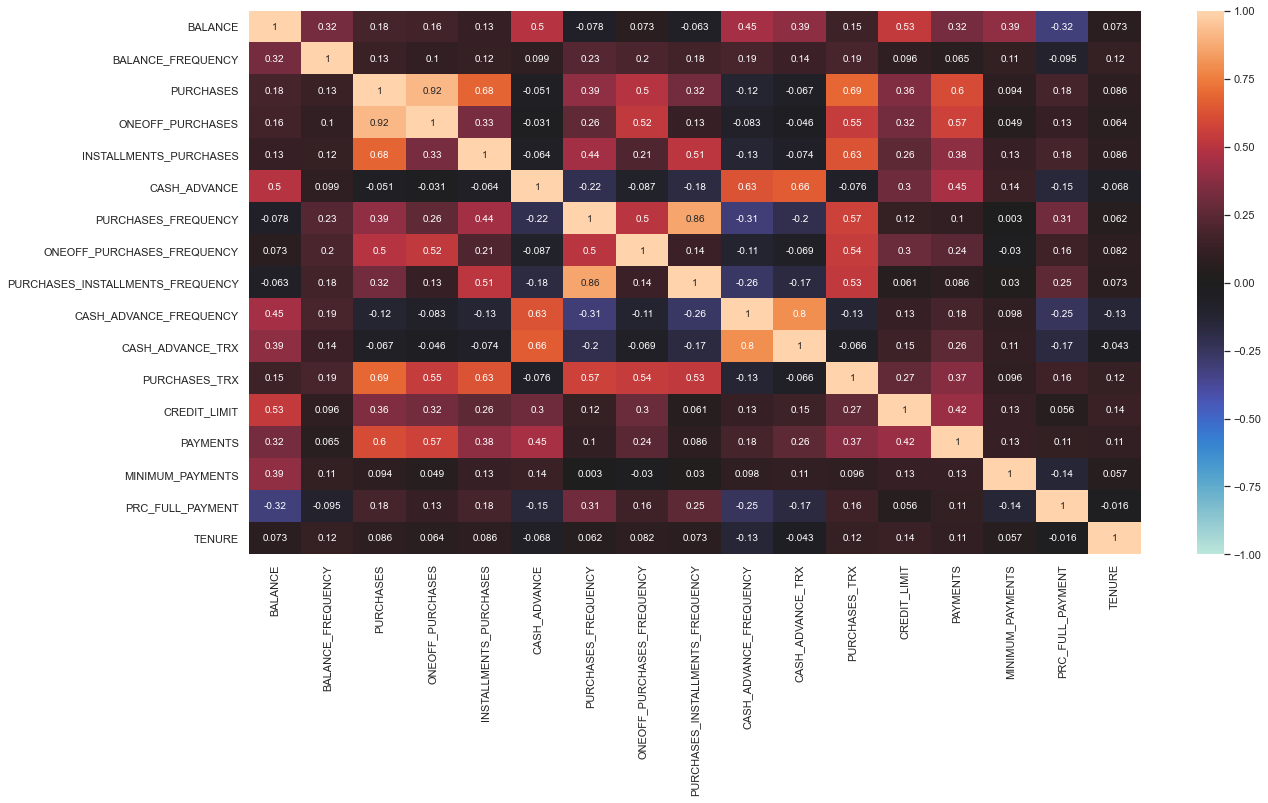

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(a,vmin=-1,vmax=1,center=0,annot=True)

In [12]:
df = card.drop('CUST_ID', axis=1)
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [13]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.24943448, -0.42489974, -0.35693402, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.13432467, -0.46955188, -0.35693402, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.51808382, -0.10766823,  0.10888851, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.18547673, -0.40196519, -0.35693402, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.18547673, -0.46955188, -0.35693402, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.88903307,  0.04214581,  0.30173158, ..., -0.33294642,
        -0.52555097, -4.12276757]])

**K Means Modelling**

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(df)

KMeans(n_clusters=6, random_state=0)

In [15]:
kmeans.labels_

array([0, 3, 1, ..., 0, 0, 0])

In [16]:
df['Cluster'] = kmeans.labels_
display(df)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [17]:
# menghitung nilai k yang optimal

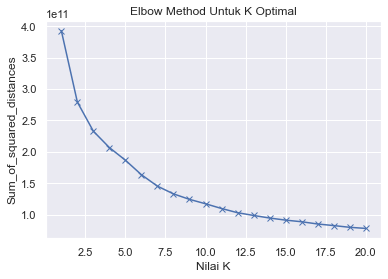

In [18]:
Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method Untuk K Optimal')
plt.show()

In [19]:
km_sample = KMeans(n_clusters=4)
km_sample.fit(df)

KMeans(n_clusters=4)

In [20]:
labels_sample = km_sample.labels_

In [21]:
df['label'] = labels_sample

C:\Users\S430F\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

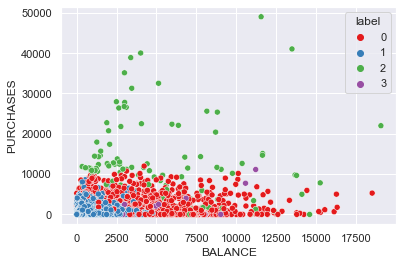

In [22]:
sns.set_palette('Set2')
sns.scatterplot(df['BALANCE'],df['PURCHASES'],hue=df['label'],palette='Set1')

label 0: Saldo rendah dan pembelian rendah - Kelompok yang bagus

label 1: Saldo rendah hingga sedang dan pembelian tinggi - Kelompok boros

label 2: Saldo sedang dan pembelian sedang - Kelompok pemilih

label 3: Saldo sedang hingga tinggi dan pembelian rendah - Kelompok hemat**